# 04: Different Topologies
This notebook contains all the useful computations to make Figures in 
Panel 4

In [1]:
%matplotlib inline
#
from lrgsglib.core import *
#
move_to_rootf()
plt.style.use('ipynb/nb_plotsheet.mplstyle')
#
path_panel4_data = pth_join(PATHNDATA, PATHNPLOT, 'paper', 'panel_4')
path_er_phtra = pth_join(path_panel4_data, 'phtra_ER')
path_er_ising = pth_join(path_panel4_data, 'ising_ER')
path_l2d_phtra = pth_join(path_panel4_data, 'phtra_l2drew')
#
kwargs_lines = dict(lw=5, marker='')

Current working directory: /home/opisthofulax/PhD/projects/complex-networks/lrgsglib


## Fig. (a): the Phase Transition for an Erdos 

In [2]:
def plot_data(fig, ax, sizes, pathfname, plot_col=0, legend={'fontsize': 28}):
    # Generate color cycle
    set_color_cycle(sizes, ax)
    # Loop through sizes and plot data
    for cc, size in enumerate(sizes):
        L = (np.sqrt(size) if plot_col == 1 else 1)
        data = np.loadtxt(pathfname+str(size), delimiter=',')
        p = data[:, 9]
        y_data = gaussian_filter(data[:, plot_col] * L, sigma=2)
        ax.plot(p, y_data, label=fr'${size}$', zorder=1/(cc+1), **kwargs_lines)
    # Set axis labels
    match plot_col:
        case 0:
            ax.set_xlabel(r'$p$')
            ax.set_ylabel(r'$P_{\infty}$')
        case 1:
            ax.set_title(r'$\chi$', pad=10)
    if legend:
        ax.legend(**legend)

In [3]:
sizes = [128, 256, 512, 1024, 2048, 4096]
pathfname = pth_join(path_er_phtra, "OP_ER10_N")

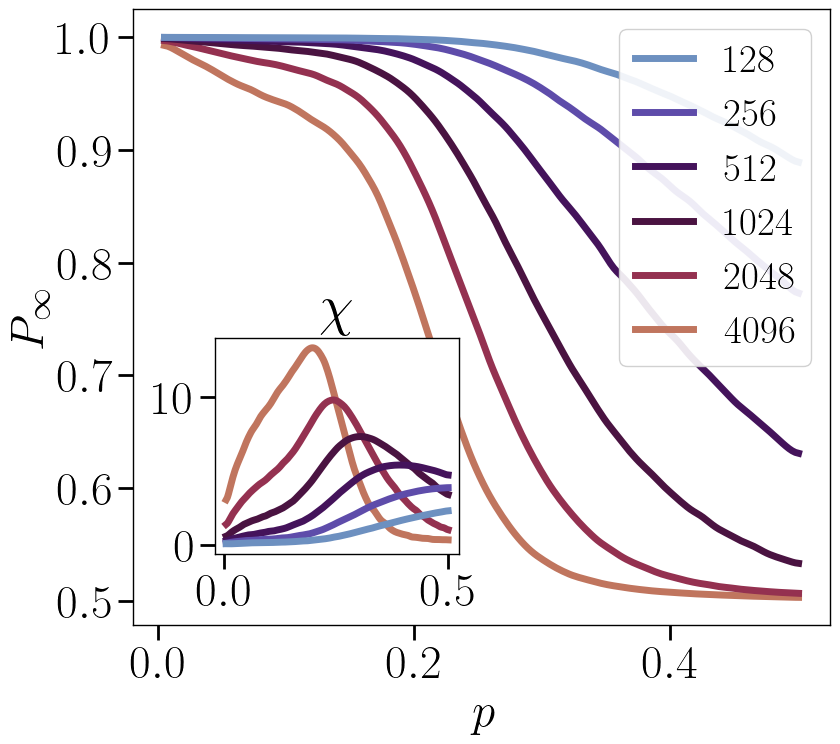

In [4]:
fig, ax = plt.subplots(1, 1, figsize=(9, 8))
plot_data(fig, ax, sizes, pathfname, legend={'fontsize': 28, 'loc': 'upper right'})
axins = inset_axes(ax, width="100%", height="100%", 
                   bbox_to_anchor=(0.13, 0.13, 0.35, 0.35), 
                   loc='upper right', bbox_transform=ax.transAxes)
plot_data(fig, axins, sizes, pathfname, plot_col=1, legend={})
fig.savefig(pth_join(path_panel4_data, 'panel_4a.pdf'), bbox_inches='tight', transparent=True)

## Fig. (b): the Phase Transition for a Lattice 2D rewired

In [5]:
def plot_phtra_data(fig, ax, sizes, geo, dataOut_path=path_l2d_phtra,
                    prew=0.05, sort_col=1, plot_col=4, sigma=2,
                    legend_kwargs=dict(loc='lower left', fontsize=28)):
    # Generate color cycle using restr_twilight
    set_color_cycle(sizes, ax)
    # Loop through sizes and plot data
    for size in sizes:
        L = (1 if plot_col != 5 else size)
        # Initialize Lattice2D instance
        lattice = Lattice2D(size, prew=prew, geo=geo, dataOut=dataOut_path)
        data = np.loadtxt(pth_join(lattice.phtrapath, "full.txt"))
        sorted_data = np.array(sorted(data, key=lambda x: x[sort_col]))
        p = sorted_data[:, sort_col]
        ydata = gaussian_filter(sorted_data[:, plot_col] * L, sigma=sigma)
        ax.plot(p, ydata, label=fr'${size**2}$', zorder=1/(size + 1), **kwargs_lines)
    match plot_col:
        case 4:
            ax.set_xlabel(r'$p$')
            ax.set_ylabel(r'$P_{\infty}$')
        case 5:
            ax.set_title(r'$\chi$', pad=10)
    if legend_kwargs is not None:
        ax.legend(**legend_kwargs)

In [6]:
sizes = [32, 64, 96, 128]
geo = 'sqr'

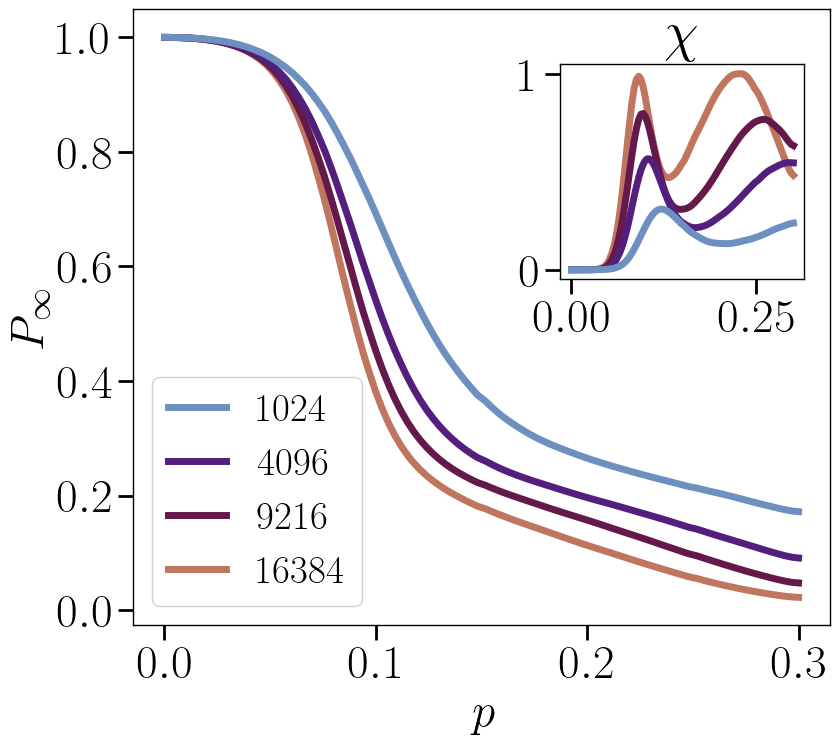

In [7]:
fig, ax = plt.subplots(1, 1, figsize=(9, 8))
plot_phtra_data(fig, ax, sizes, geo)
axins = inset_axes(ax, width="100%", height="100%", 
                   bbox_to_anchor=(0.625, 0.575, 0.35, 0.35), 
                   loc='upper right', bbox_transform=ax.transAxes)
plot_phtra_data(fig, axins, sizes, geo, plot_col=5, legend_kwargs=None)
fig.savefig(pth_join(path_panel4_data, f'panel_4b_{geo}.pdf'), bbox_inches='tight', transparent=True)

## Fig. (c): the Phase transition for a Diluted 3D

In [8]:
def plot_phtra_l3dil_data(ax, sizes, extract_regex=r"sigma=([\d.]+)", plot_col=3,
                         dataOut_path="data/plot/paper/panel_4/phtra_l3dil",
                         pdil=0.25, sigma_filter=2, legend_kwargs=dict(fontsize=28)):
    set_color_cycle(sizes, ax)
    for size in sizes:
        lattice = Lattice3D(size, pdil=pdil, dataOut=dataOut_path)
        L = (np.sqrt(lattice.N) if plot_col == 5 else 1)
        data = np.loadtxt(pth_join(lattice.phtrapath, "full.txt"))
        srt_data = np.array(sorted(data, key=lambda x: x[3], reverse=True))
        filenames = os.listdir(lattice.phtrapath)
        sigma = extract_values_from_filenames(filenames, extract_regex)
        if len(sigma) != len(srt_data):
            print(f"Warning: Number of sigma values ({len(sigma)}) does not match number of data points ({len(srt_data)}).")
        y_data = gaussian_filter(srt_data[:, plot_col] * L, sigma=sigma_filter)
        ax.plot(sigma, y_data, label=fr'${size**3}$', **kwargs_lines)
    # Set axis labels
    match plot_col:
        case 3:
            ax.set_xlabel(r'$\sigma$')
            ax.set_ylabel(r'$P_{\infty}$')  # Replace with appropriate ylabel
        case 5:
            ax.set_title(r'$\chi$', pad=10)
    # Add legend
    if legend_kwargs is not None:
        ax.legend(fontsize=28, **legend_kwargs)

In [9]:
sizes = [10, 20, 30, 40]

/home/opisthofulax/PhD/projects/complex-networks/lrgsglib/src/lrgsglib/nx_patches/funcs.py:781: UserWarning: The resulting graph is no longer connected. Returning                       the largest connected component.
  warnings.warn("The resulting graph is no longer connected. Returning \


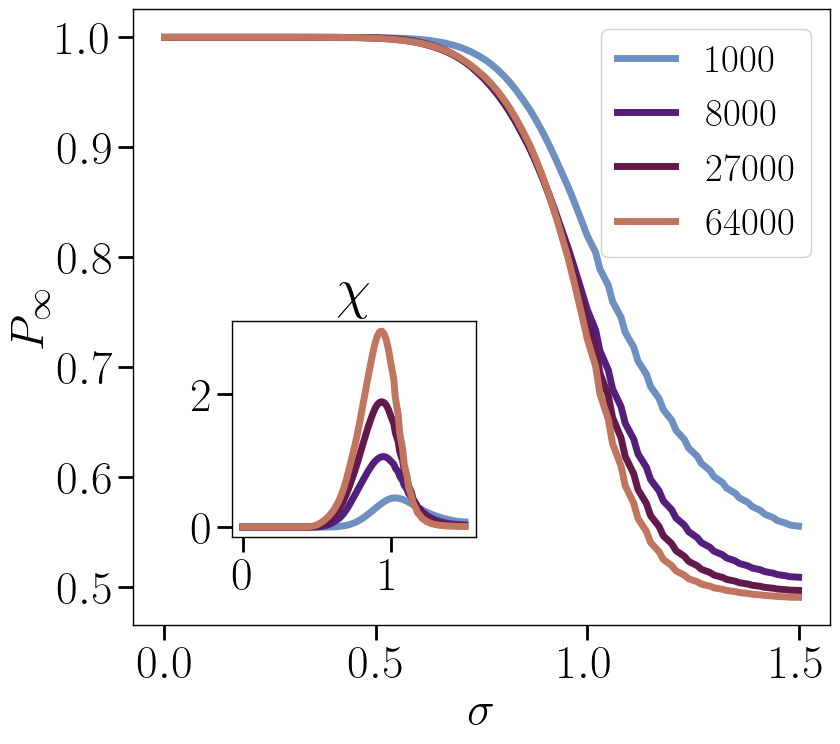

In [10]:
fig, ax = plt.subplots(1, 1, figsize=(9, 8))
plot_phtra_l3dil_data(ax, sizes, legend_kwargs=dict(loc='upper right'))
axins = inset_axes(ax, width="100%", height="100%", 
                   bbox_to_anchor=(0.13, 0.13, 0.35, 0.35), 
                   loc='lower left', bbox_transform=ax.transAxes)
# axins.tick_params(axis='both', labelsize=20)
plot_phtra_l3dil_data(axins, sizes, legend_kwargs=None, plot_col=5)
fig.savefig(pth_join(path_panel4_data, 'panel_4c.pdf'), bbox_inches='tight', transparent=True)

## Fig. (d): the Ising on ER

In [25]:
size = 2048
kavg = 10

In [26]:
er = ErdosRenyi(size, kavg/size, dataOut=path_er_ising)
fnames = os.listdir(er.isingpath)
p_values = extract_values_from_filenames(fnames, r"p=([\d.]+)", unique=True)
p_T_dict = {p: extract_values_from_filenames(fnames, rf"p={p}_T=([\d.]+)") 
            for p in p_values}

In [27]:
averages = []
for p in p_values:
    for T in p_T_dict[p]:
        filename = f"outcl0_p={p}_T={T}.txt"
        filepath = os.path.join(er.isingpath, filename)
        if os.path.exists(filepath):
            data = np.loadtxt(filepath)
            avg_abs_col1 = np.mean(np.abs(data[:, 0]))
            averages.append((float(p), float(T), avg_abs_col1))
averages = np.array(averages)

In [28]:
p_values_plot = averages[:, 0]
T_values_plot = averages[:, 1]
avg_abs_col1_plot = averages[:, 2]
x, y, z = interpolate_grid_data(p_values_plot, T_values_plot, avg_abs_col1_plot)
z_smoothed = gaussian_filter(z, sigma=2)  # Adjust sigma for more/less smoothing

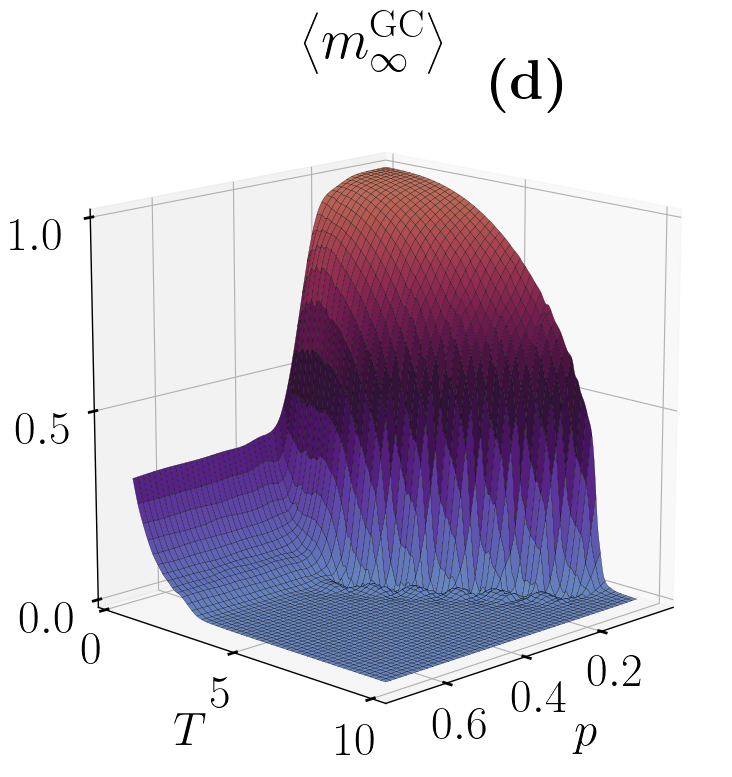

In [29]:
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.plot_surface(x, y, z_smoothed, cmap=restr_twilight, 
                edgecolor='k', lw=0.2)

ax.set_xlabel(r'$p$', labelpad=20)
ax.set_ylabel(r'$T$', labelpad=20)
ax.set_title(r'$\avg*{m_{\infty}^{\mathrm{GC}}}$')
ax.set_zticks([0, 0.5, 1])
ax.view_init(elev=15, azim=45)
ax.set_box_aspect([1,1,1])
ax.zaxis.set_tick_params(pad=15)
ax.set_zlim(0, 1)
ax.text(0.1, 5, 1.25, r'\textbf{(d)}', fontsize=40, 
                fontweight='bold', color='black')
fig.savefig(os.path.join(path_panel4_data, 'panel_4d.pdf'), 
            bbox_inches='tight', transparent=True)

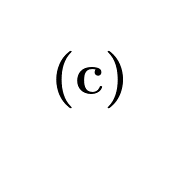

In [41]:
fig, ax = plt.subplots(1, 1, figsize=(2, 2))
ax.axis('off')
ax.text(.3, .45, r'\textbf{(c)}', fontsize=42, 
                fontweight='bold', color='black')
fig.savefig(os.path.join(path_panel4_data, 'letter.pdf'), transparent=True)